# Rider data analysis

Source of the data: https://www.letour.fr/en/history

On its official website, the Tour de France lists riders’ results in its famed bicycle race since 1903. The site doesn’t provide downloads, but applied mathematician Thomas Camminady has scraped it to build a CSV file containing each finisher’s rank, time, team, and more.

## Import data

import necessary libraries from pythons


In [39]:
# Some basic, common libraries used:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

Scrape data (download from site into HTML format)
Clean up data and convert into readable CSV
https://github.com/camminady/LeTourDataSet/blob/master/main.ipynb

read in and inspect data

In [3]:
# https://github.com/camminady/LeTourDataSet/blob/master/README.md

rider_df = pd.read_csv('https://raw.githubusercontent.com/camminady/LeTourDataSet/master/Riders.csv')
rider_df.head() 
rider_df.describe(include='all')

,Unnamed: 0,Year,Rider,Rank,Time,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,Team,RiderNumber,TotalSeconds,Gap,Bonus,Points,NumberStages,ListedAvgPace
count,9452.000000,9452.000000,9452,9452.000000,9255,9452.000000,9255.000,9255.000000,9255.000000,9255.000000,9452,9452.000000,9.255000e+03,9255,164,197.000000,9452.000000,9151.000000
unique,NaN,NaN,3397,NaN,8909,NaN,NaN,NaN,NaN,NaN,650,NaN,NaN,7021,46,NaN,NaN,NaN
top,NaN,NaN,SYLVAIN CHAVANEL,NaN,00h 00' 00'',NaN,NaN,NaN,NaN,NaN,FRANCE,NaN,NaN,-,04',NaN,NaN,NaN
freq,NaN,NaN,16,NaN,74,NaN,NaN,NaN,NaN,NaN,193,NaN,NaN,166,20,NaN,NaN,NaN
mean,4725.500000,1981.128862,NaN,57.569086,NaN,3966.960643,inf,109.949109,29.063425,29.193625,NaN,89.031845,3.975898e+05,NaN,NaN,325.182741,21.352730,36.589313
std,2728.701706,29.744678,NaN,41.113251,NaN,572.318961,NaN,38.219958,17.466952,17.526999,NaN,60.261518,1.376514e+05,NaN,NaN,166.116559,2.311157,4.255119
min,0.000000,1903.000000,NaN,1.000000,NaN,2428.000000,12.351,0.000000,0.000000,0.000000,NaN,1.000000,0.000000e+00,NaN,NaN,37.000000,6.000000,24.056000
25%,2362.750000,1962.000000,NaN,23.000000,NaN,3525.000000,34.830,89.000000,14.000000,14.000000,NaN,36.000000,3.226100e+05,NaN,NaN,175.000000,21.000000,34.906000
50%,4725.500000,1988.000000,NaN,49.000000,NaN,3846.000000,37.668,98.000000,29.000000,29.000000,NaN,83.000000,3.530660e+05,NaN,NaN,327.000000,21.000000,38.059000
75%,7088.250000,2005.000000,NaN,86.000000,NaN,4274.000000,39.110,119.000000,44.000000,45.000000,NaN,133.000000,4.288855e+05,NaN,NaN,479.000000,23.000000,39.788000


shape of data (number of rows & columns)

In [4]:
print(rider_df.shape)

(9452, 18)


Review statistics of data 

# Clean Data

Replace any NaN / empty rows

In [ ]:
#rider_df.fillna(0, inplace=True)

# EDA

At the beginning of a data analysis we'll want to explore any possible relationships and other insights we can learn from the data. 

Visual exploration using line/box/scatter plots and histograms will provide a first look into the possible relationships that lies within the data. 

In [5]:
rider_df.describe()

,Unnamed: 0,Year,Rank,DistanceKilometer,PersonalAvgPace,Hours,Minutes,Seconds,RiderNumber,TotalSeconds,Points,NumberStages,ListedAvgPace
count,9452.000000,9452.000000,9452.000000,9452.000000,9255.000,9255.000000,9255.000000,9255.000000,9452.000000,9.255000e+03,197.000000,9452.000000,9151.000000
mean,4725.500000,1981.128862,57.569086,3966.960643,inf,109.949109,29.063425,29.193625,89.031845,3.975898e+05,325.182741,21.352730,36.589313
std,2728.701706,29.744678,41.113251,572.318961,NaN,38.219958,17.466952,17.526999,60.261518,1.376514e+05,166.116559,2.311157,4.255119
min,0.000000,1903.000000,1.000000,2428.000000,12.351,0.000000,0.000000,0.000000,1.000000,0.000000e+00,37.000000,6.000000,24.056000
25%,2362.750000,1962.000000,23.000000,3525.000000,34.830,89.000000,14.000000,14.000000,36.000000,3.226100e+05,175.000000,21.000000,34.906000
50%,4725.500000,1988.000000,49.000000,3846.000000,37.668,98.000000,29.000000,29.000000,83.000000,3.530660e+05,327.000000,21.000000,38.059000
75%,7088.250000,2005.000000,86.000000,4274.000000,39.110,119.000000,44.000000,45.000000,133.000000,4.288855e+05,479.000000,23.000000,39.788000
max,9451.000000,2020.000000,174.000000,5745.000000,inf,299.000000,59.000000,59.000000,321.000000,1.078413e+06,596.000000,26.000000,41.654000


# *Graphs*

good resource https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=bZv4MenQpYOF

create the columns needed for the visualization

In [38]:
year = np.unique(rider_df["Year"])
distance = rider_df.groupby("Year").agg("mean")["DistanceKilometer"].values
winnerpace = rider_df.groupby("Year").first()["PersonalAvgPace"]
meantime = rider_df.groupby("Year").agg("mean")["TotalSeconds"]
meanpace = distance/meantime*3600

Line graph of winners avg pace & total average pace YoY

In [7]:
# good example here https://flowingdata.com/2021/04/27/surprise-less-happiness-during-pandemic/

# sample viz code(s)

#ys = 200 + np.random.randn(100)
#x = [x for x in range(len(ys))]

#plt.plot(x, ys, '-')
#plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

#plt.title("Sample Visualization")
#plt.show()

=================



SyntaxError: ignored

In [37]:
import statsmodels.formula.api as smf
smf.ols('winnerpace2 ~ year', data=rider_df).fit().summary()

rider_df.info("winnerpace")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


PatsyError: ignored

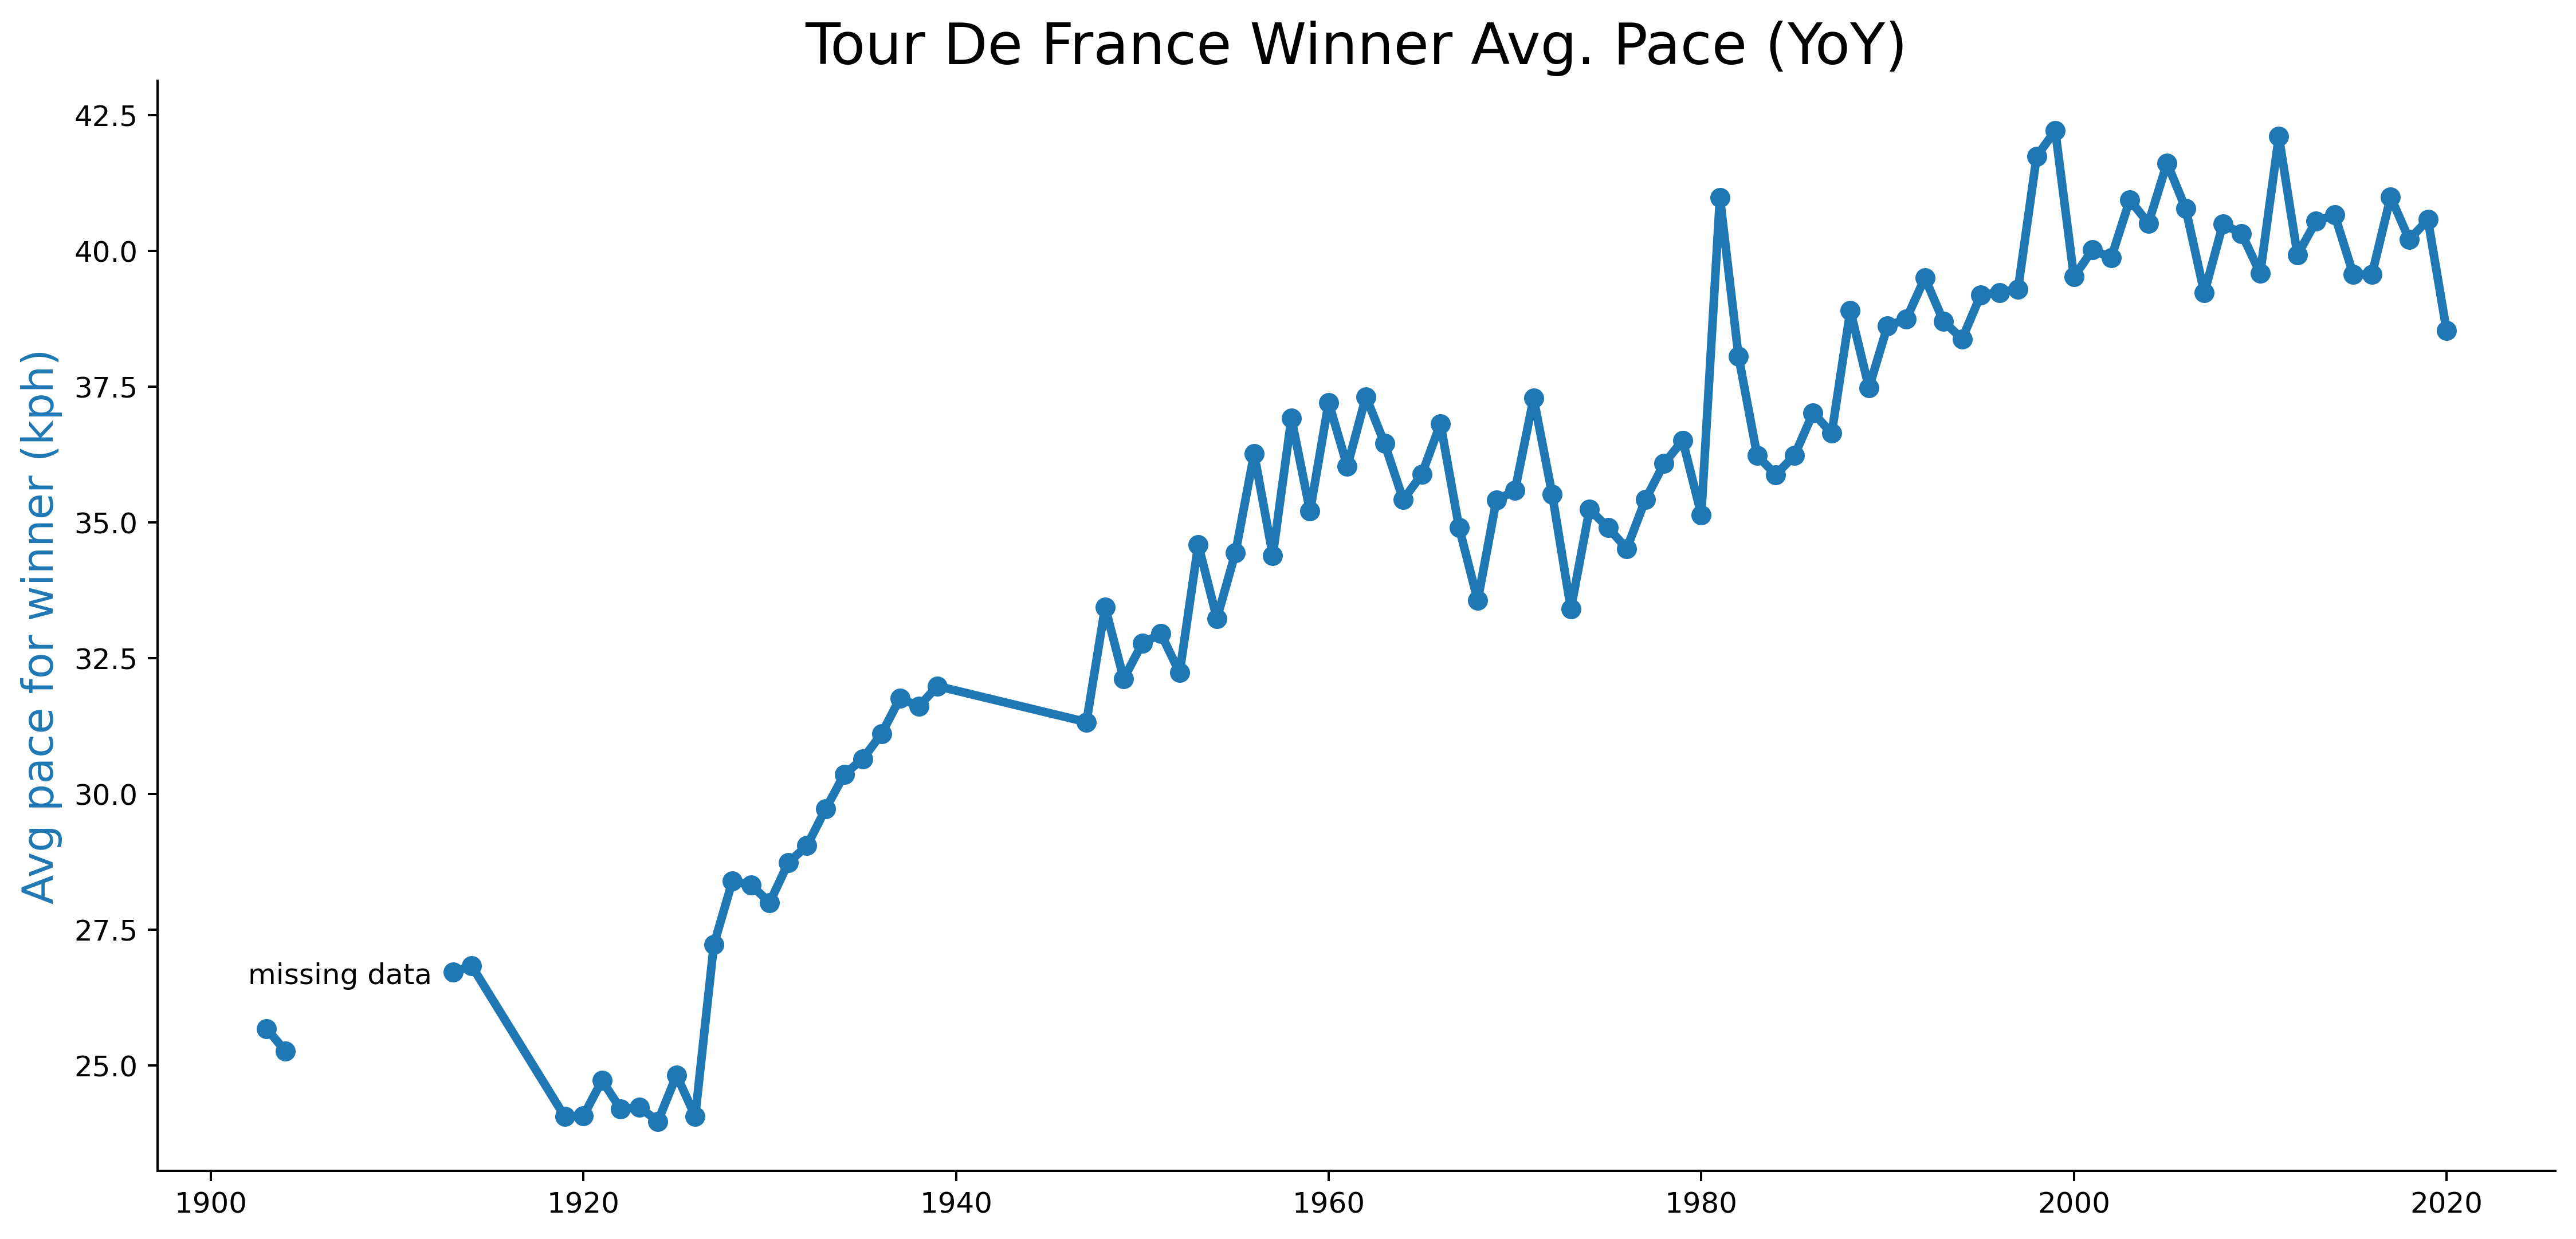

In [76]:

#1st line (winner pace)
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(year,winnerpace, "-o",lw=3)
ax.set_ylabel("Avg pace for winner (kph)",fontsize = 15, color= "tab:blue")
ax.set_title('Tour De France Winner Avg. Pace (YoY)', fontsize = 20)
plt.rcParams['figure.dpi'] = 360
sns.despine()

#add text annotation
#plt.annotate("here is some text", xy =(2,12))
#style = dict(size=10, color='gray')
#ax.text('test', 3950, "New Year's Day", **style)


#2nd line (average/field pace)

#ax2 = ax.twinx()
#ax2.plot(year,meanpace, "-r",lw=3)
#ax2.set_ylabel("Avg pace for all riders (kph)",fontsize = 15, color= "tab:red")
#ax.set_xlabel("Year", fontsize = 20)

#annotations 

#https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.11-Plot-Annotations/

#https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html

bbox_props = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)


#ax.annotate('missing data',
            #xy=(0.05, 0.15),
            #xycoords='axes fraction',
            #xytext=(0.05, 0.15),
            #bbox=bbox_props)
            #arrowprops=
                #dict(facecolor='black', shrink=0.05),
                #horizontalalignment='left',
                #verticalalignment='center')

ax.text(1902.000000, 26.5, "missing data")


fig.show()

things to change

https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5


*   Add trendline
*   Ability to hover and see names (and speeds) of winners...
*   Add an annotation? https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html 










Add in an annotation / hovermode

https://plotly.com/python/hover-text-and-formatting/

In [48]:
fig = px.line(rider_df, x="Year", y="ListedAvgPace", title="layout.hovermode='closest' (the default)")

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
          )
)


fig.show()